In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Get Datasets

In [2]:
df_train = pd.read_csv('../datasets/kitti_train_1.csv')
df_valid = pd.read_csv('../datasets/kitti_valid_1.csv')

In [3]:
df_train

filename   class         xmin       ymin        xmax       ymax  \
0      000000.png  person   711.876830  151.95032   809.37300  308.49020   
1      000001.png     car   390.577850  181.78027   421.47256  200.24520   
2      000002.png     car   655.786800  190.24402   698.48170  221.83864   
3      000003.png     car   612.129300  176.14651   729.66540  282.53200   
4      000004.png     car   283.695470  184.47151   343.14720  211.07599   
...           ...     ...          ...        ...         ...        ...   
21062  005215.png     car   553.735400  174.48686   579.61694  190.00816   
21063  005215.png     car   719.924700  170.22932   742.33520  188.81589   
21064  005216.png     car  1211.896500  142.39505  1241.96140  211.77080   
21065  005216.png     car   368.255680  192.41075   479.21286  276.29410   
21066  005216.png     car    54.721306  197.53711   391.66632  362.24500   

       angle   zloc weather  depth_x  depth_y  depth_mean  depth_min  \
0      -0.20   8.41   clone      740      206    1.353852   0.924981   
1       1.85  58.49   clone      402      199    8.203781   7.599062   
2      -1.67  34.38   clone      688      215    5.255445   4.330805   
3       1.55  13.22   clone      714      223    2.592289   1.617189   
4       1.96  38.26   clone      289      205    5.243309   4.655009   
...      ...    ...     ...      ...      ...         ...        ...   
21062   1.84  62.47   clone      567      183    8.150455   7.454554   
21063  -1.55  58.67   clone      736      186    7.877936   7.352264   
21064  -0.78   9.95   clone     1239      189    1.942413   1.628262   
21065   1.86  14.21   clone      368      250    1.911475   1.433593   
21066   2.03   8.50   clone      163      334    1.171009   0.796054   

       depth_median  depth_max  depth_mean_trim       width     height  
0          1.188141   3.025311         1.258110   97.496170  156.53988  
1          8.042789   9.251301         8.120802   30.894710   18.46493  
2          4.740215   9.392394         4.779619   42.694900   31.59462  
3          1.772914   9.068852         1.894969  117.536100  106.38549  
4          5.002338   7.594889         5.023374   59.451730   26.60448  
...             ...        ...              ...         ...        ...  
21062      8.080090   9.218063         8.114559   25.881540   15.52130  
21063      7.784040   9.412163         7.794066   22.410500   18.58657  
21064      1.764078   3.141202         1.796906   30.064900   69.37575  
21065      1.790029   5.442939         1.783815  110.957180   83.88335  
21066      1.005506   3.093226         1.013867  336.945014  164.70789  

[21067 rows x 18 columns]

In [4]:
df_train['filename'].unique()

array(['000000.png', '000001.png', '000002.png', ..., '005214.png',
       '005215.png', '005216.png'], dtype=object)

In [5]:
df_train[df_train['filename']=='000032.png']['filename'].index

Int64Index([75, 76, 77, 78, 79], dtype='int64')

In [6]:
df_train.describe()

xmin          ymin          xmax          ymax         angle  \
count  21067.000000  21067.000000  21067.000000  21067.000000  21067.000000   
mean     509.558719    177.941251    604.251510    245.445924     -0.045417   
std      270.111245     20.720301    269.069659     52.984205      1.786278   
min       -2.276925     -0.092592     11.237398    133.432740     -3.140000   
25%      340.870575    170.961460    433.553925    206.756880     -1.630000   
50%      532.324770    178.062990    571.142600    225.892180     -0.700000   
75%      681.551390    185.146745    740.799680    268.936610      1.790000   
max     1228.319700    331.121430   1242.628900    375.010040      3.140000   

               zloc       depth_x       depth_y    depth_mean     depth_min  \
count  21067.000000  21067.000000  21067.000000  21067.000000  21067.000000   
mean      27.119011    554.310913    221.317226      3.662710      2.906728   
std       17.111743    298.022162     49.900267      2.130873      1.920021   
min       -1.870000      0.000000      1.000000      0.491386      0.180934   
25%       13.420000    365.000000    193.000000      1.893538      1.369494   
50%       23.830000    548.000000    208.000000      3.309681      2.491894   
75%       37.770000    728.000000    236.000000      5.110673      4.056974   
max      103.600000   1241.000000    373.000000      9.883790      9.689011   

       depth_median     depth_max  depth_mean_trim         width        height  
count  21067.000000  21067.000000     21067.000000  21067.000000  21067.000000  
mean       3.400618      6.524547         3.418172     94.692791     67.504673  
std        2.139045      2.476334         2.137986     86.521313     50.490065  
min        0.394819      0.709841         0.434852      8.186540      9.366060  
25%        1.650379      4.507836         1.663156     37.231335     31.160310  
50%        2.974887      7.048723         2.983102     62.367490     48.491970  
75%        4.763700      8.772098         4.791546    117.310625     88.048040  
max        9.917007      9.977266         9.910336    721.560590    371.316579

In [7]:
df_train['class'].unique()

array(['person', 'car', 'truck', 'train', 'bicycle', 'Misc'], dtype=object)

In [8]:
# onehot encoding
class_dummy = pd.get_dummies(df_train['class'])
df_train = pd.concat([df_train, class_dummy], axis=1)

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21067 entries, 0 to 21066
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   filename         21067 non-null  object 
 1   class            21067 non-null  object 
 2   xmin             21067 non-null  float64
 3   ymin             21067 non-null  float64
 4   xmax             21067 non-null  float64
 5   ymax             21067 non-null  float64
 6   angle            21067 non-null  float64
 7   zloc             21067 non-null  float64
 8   weather          21067 non-null  object 
 9   depth_x          21067 non-null  int64  
 10  depth_y          21067 non-null  int64  
 11  depth_mean       21067 non-null  float64
 12  depth_min        21067 non-null  float64
 13  depth_median     21067 non-null  float64
 14  depth_max        21067 non-null  float64
 15  depth_mean_trim  21067 non-null  float64
 16  width            21067 non-null  float64
 17  height      

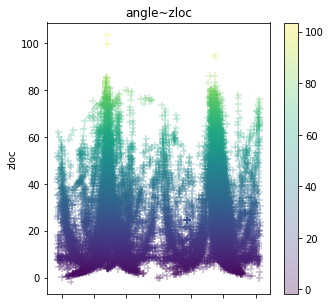

In [10]:
z_size = df_train.zloc

df_train.plot(kind='scatter', x='angle', y='zloc', marker='+', figsize=(5,5), cmap='viridis', c=z_size, s=50, alpha=0.3)
plt.xlabel('angle')
plt.ylabel('zloc')
plt.title('angle~zloc')
plt.show()

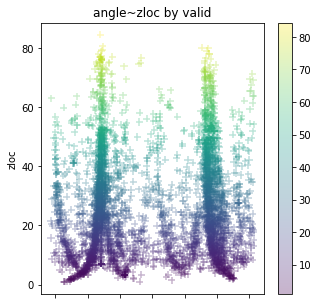

In [11]:
z_size = df_valid.zloc

df_valid.plot(kind='scatter', x='angle', y='zloc', marker='+', figsize=(5,5), cmap='viridis', c=z_size, s=50, alpha=0.3)
plt.xlabel('angle')
plt.ylabel('zloc')
plt.title('angle~zloc by valid')
plt.show()

#### Visualization

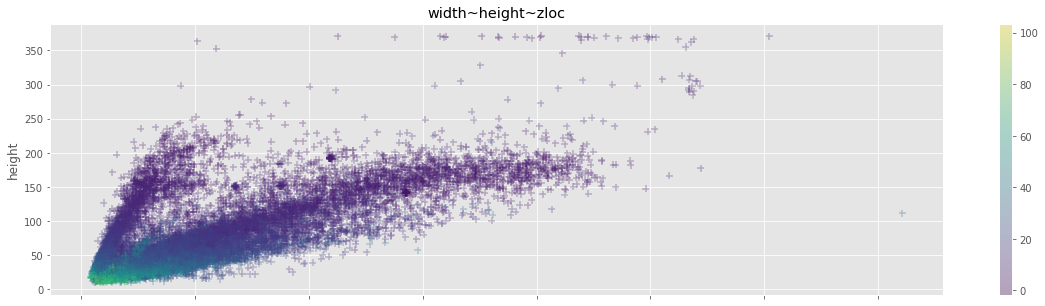

In [12]:
z_size = df_train.zloc
plt.style.use('ggplot')

df_train.plot(kind='scatter', x='width', y='height', marker='+', figsize=(20,5), cmap='viridis', c=z_size, s=50, alpha=0.3)
plt.xlabel('width')
plt.ylabel('height')
plt.title('width~height~zloc')
plt.show()

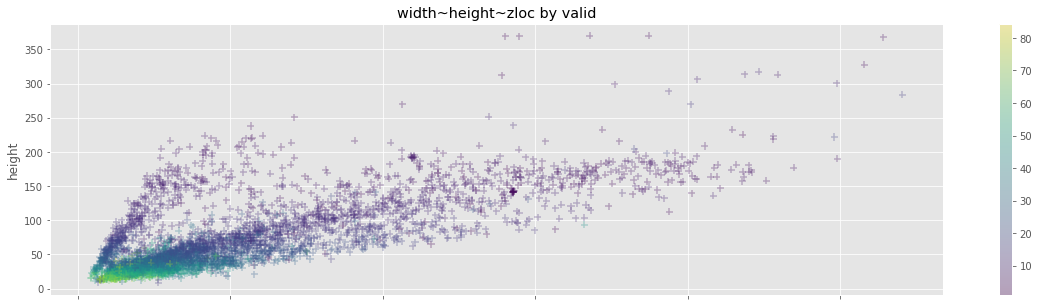

In [13]:
z_size = df_valid.zloc
plt.style.use('ggplot')

df_valid.plot(kind='scatter', x='width', y='height', marker='+', figsize=(20,5), cmap='viridis', c=z_size, s=50, alpha=0.3)
plt.xlabel('width')
plt.ylabel('height')
plt.title('width~height~zloc by valid')
plt.show()

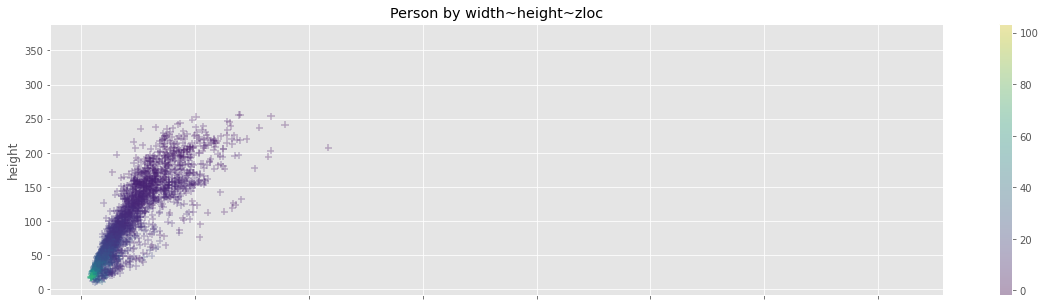

In [14]:
z_size = df_train.zloc
person = df_train['person'].values * 50

plt.style.use('ggplot')

df_train.plot(kind='scatter', x='width', y='height', marker='+', figsize=(20,5), cmap='viridis', c=z_size, s=person, alpha=0.3)
plt.title('Person by width~height~zloc')
plt.xlabel('width')
plt.ylabel('height')
plt.show()

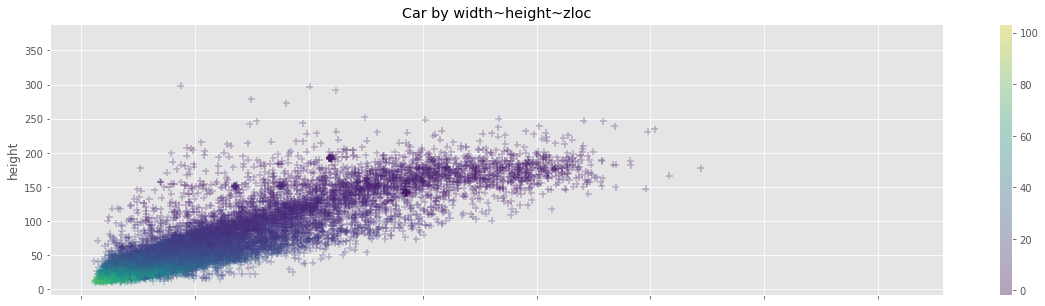

In [15]:
z_size = df_train.zloc
car = df_train['car'].values * 50

plt.style.use('ggplot')

df_train.plot(kind='scatter', x='width', y='height', marker='+', figsize=(20,5), cmap='viridis', c=z_size, s=car, alpha=0.3)
plt.title('Car by width~height~zloc')
plt.xlabel('width')
plt.ylabel('height')
plt.show()

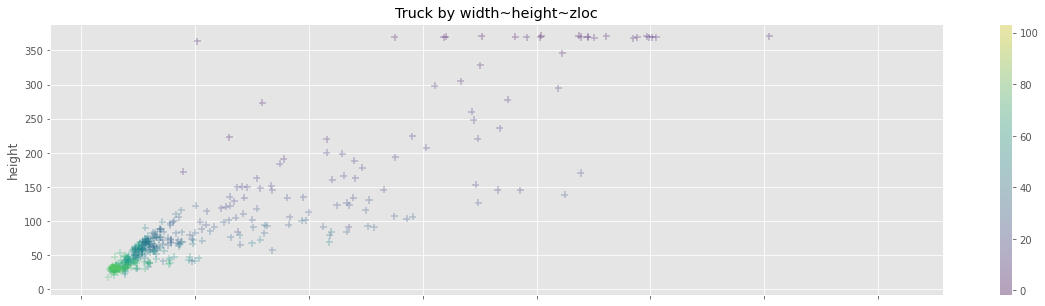

In [16]:
z_size = df_train.zloc
truck = df_train['truck'].values * 50

plt.style.use('ggplot')

df_train.plot(kind='scatter', x='width', y='height', marker='+', figsize=(20,5), cmap='viridis', c=z_size, s=truck, alpha=0.3)
plt.title('Truck by width~height~zloc')
plt.xlabel('width')
plt.ylabel('height')
plt.show()

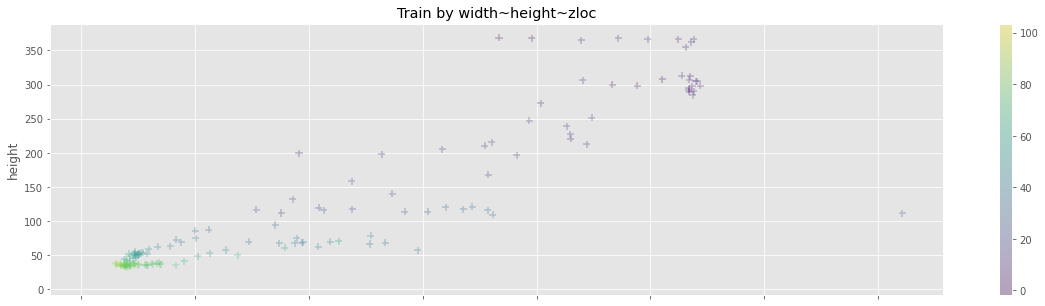

In [17]:
z_size = df_train.zloc
train = df_train['train'].values * 50

plt.style.use('ggplot')

df_train.plot(kind='scatter', x='width', y='height', marker='+', figsize=(20,5), cmap='viridis', c=z_size, s=train, alpha=0.3)
plt.title('Train by width~height~zloc')
plt.xlabel('width')
plt.ylabel('height')
plt.show()

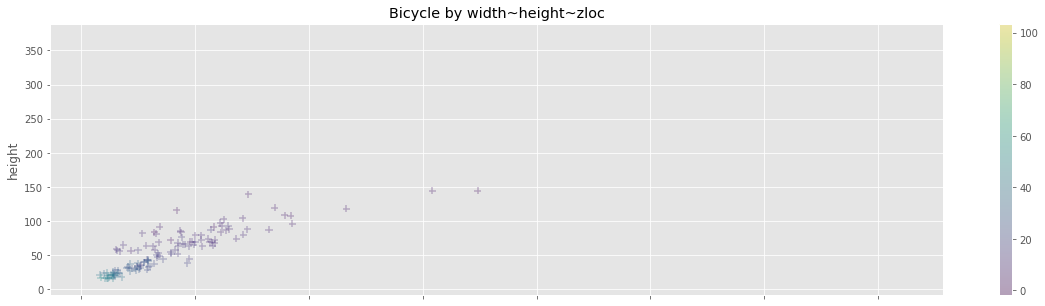

In [18]:
z_size = df_train.zloc
bicycle = df_train['bicycle'].values * 50

plt.style.use('ggplot')

df_train.plot(kind='scatter', x='width', y='height', marker='+', figsize=(20,5), cmap='viridis', c=z_size, s=bicycle, alpha=0.3)
plt.title('Bicycle by width~height~zloc')
plt.xlabel('width')
plt.ylabel('height')
plt.show()

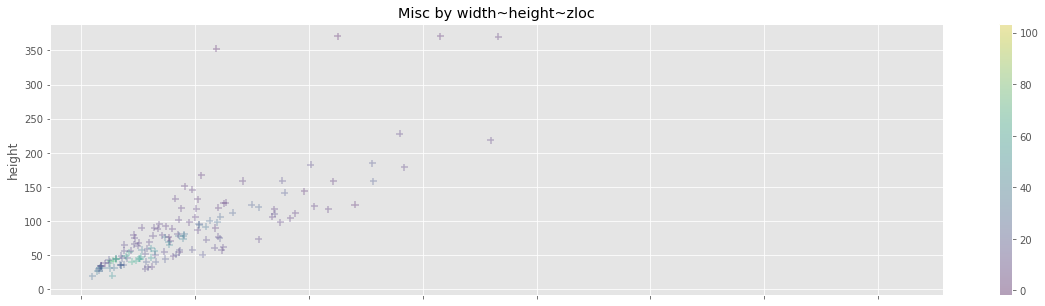

In [19]:
z_size = df_train.zloc
Misc = df_train['Misc'].values * 50

plt.style.use('ggplot')

df_train.plot(kind='scatter', x='width', y='height', marker='+', figsize=(20,5), cmap='viridis', c=z_size, s=Misc, alpha=0.3)
plt.title('Misc by width~height~zloc')
plt.xlabel('width')
plt.ylabel('height')
plt.show()

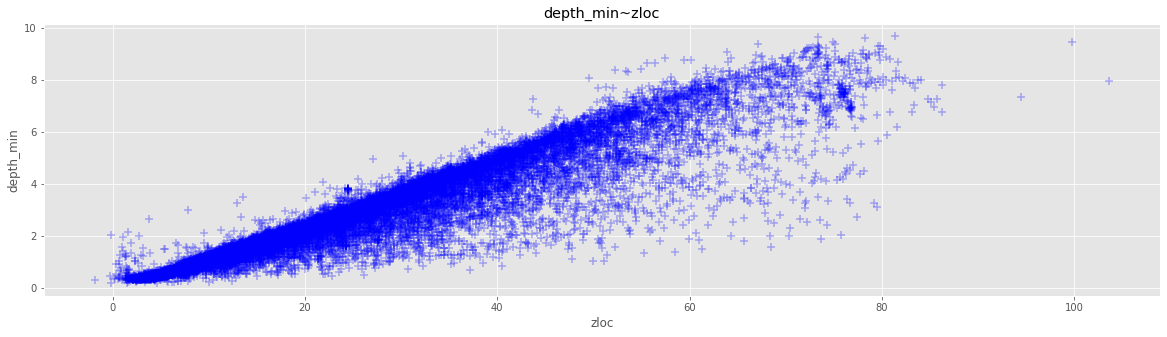

In [20]:
plt.style.use('ggplot')
df_train.plot(kind='scatter', x='zloc', y='depth_min', marker='+', figsize=(20,5), c='blue', s=50, alpha=0.3)
plt.title('depth_min~zloc')
plt.show()

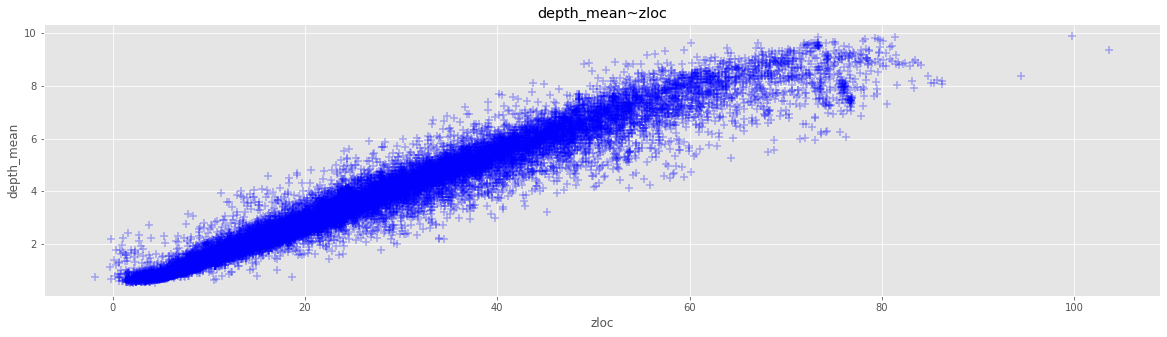

In [21]:
plt.style.use('ggplot')
df_train.plot(kind='scatter', x='zloc', y='depth_mean', marker='+', figsize=(20,5), c='blue', s=50, alpha=0.3)
plt.title('depth_mean~zloc')
plt.show()

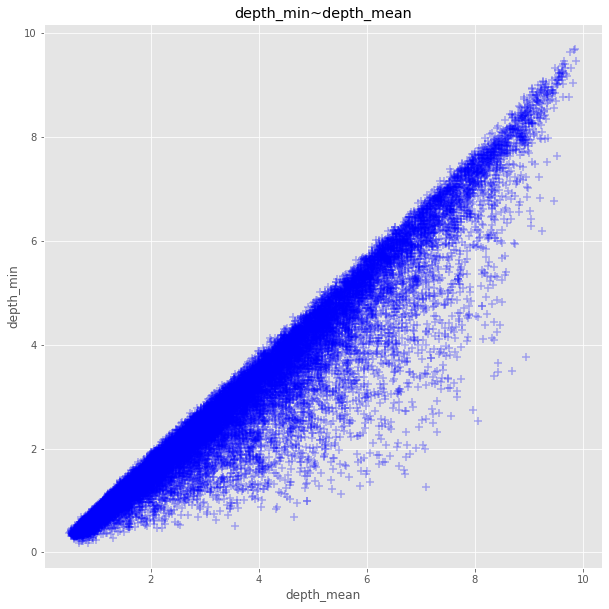

In [22]:
plt.style.use('ggplot')
df_train.plot(kind='scatter', x='depth_mean', y='depth_min', marker='+', figsize=(10,10), c='blue', s=50, alpha=0.3)
plt.title('depth_min~depth_mean')
plt.show()

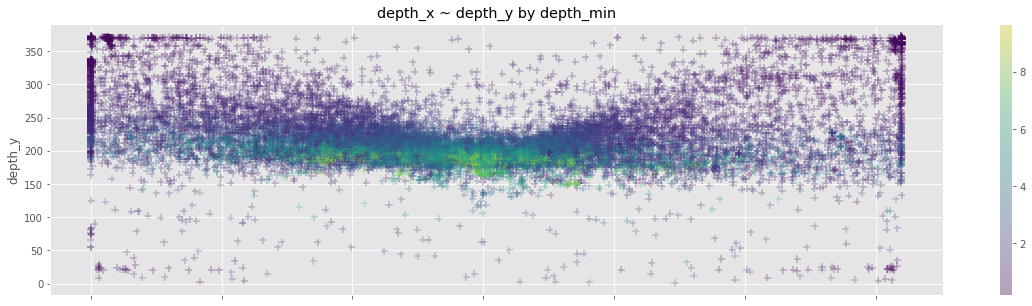

In [23]:
min_c = df_train.depth_min

plt.style.use('ggplot')
df_train.plot(kind='scatter', x='depth_x', y='depth_y', marker='+', figsize=(20,5), cmap='viridis', c=min_c, s=50, alpha=0.3)
plt.title('depth_x ~ depth_y by depth_min')
plt.show()

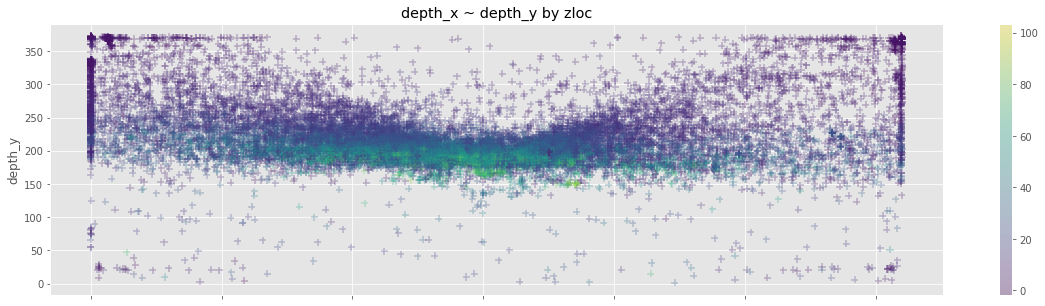

In [24]:
zloc_c = df_train.zloc

plt.style.use('ggplot')
df_train.plot(kind='scatter', x='depth_x', y='depth_y', marker='+', figsize=(20,5), cmap='viridis', c=zloc_c, s=50, alpha=0.3)
plt.title('depth_x ~ depth_y by zloc')
plt.show()

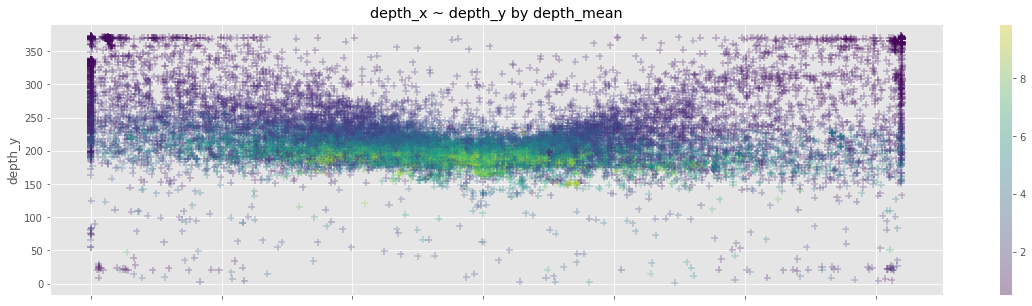

In [25]:
mean_c = df_train.depth_mean

plt.style.use('ggplot')
df_train.plot(kind='scatter', x='depth_x', y='depth_y', marker='+', figsize=(20,5), cmap='viridis', c=mean_c, s=50, alpha=0.3)
plt.title('depth_x ~ depth_y by depth_mean')
plt.show()

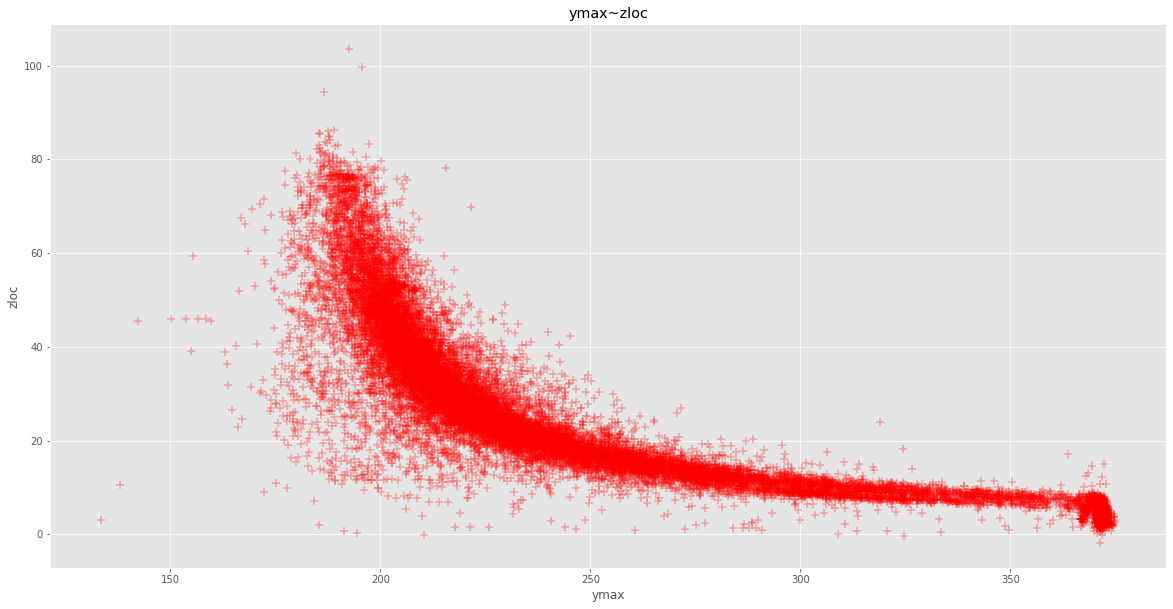

In [26]:
plt.style.use('ggplot')
df_train.plot(kind='scatter', x='ymax', y='zloc', marker='+', figsize=(20,10), c='red', s=50, alpha=0.3)
plt.title('ymax~zloc')
plt.show()

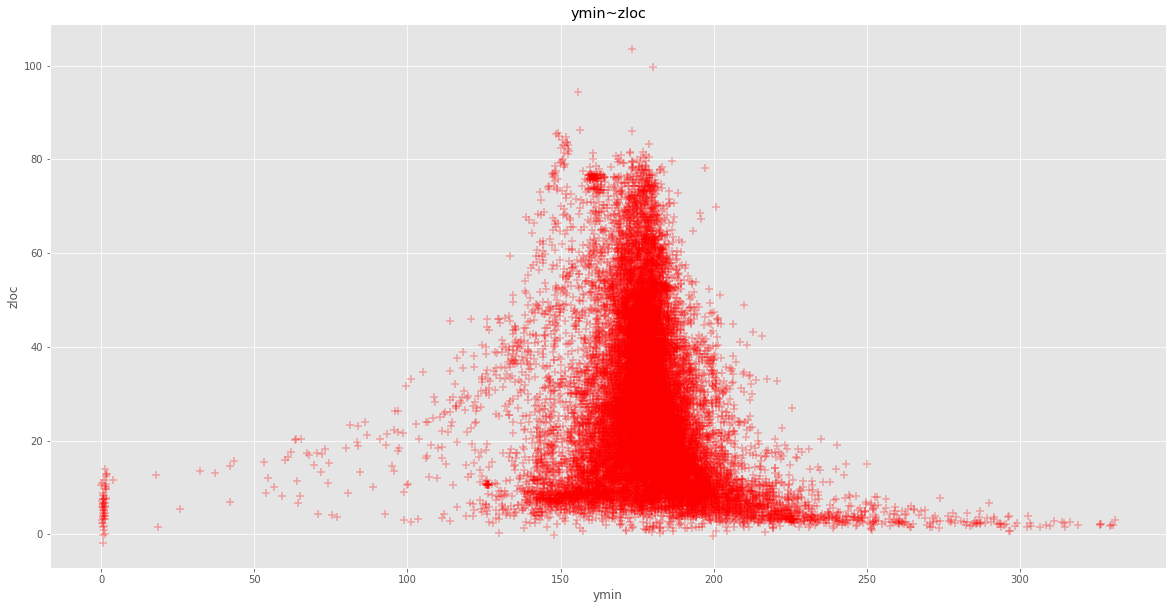

In [27]:
plt.style.use('ggplot')
df_train.plot(kind='scatter', x='ymin', y='zloc', marker='+', figsize=(20,10), c='red', s=50, alpha=0.3)
plt.title('ymin~zloc')
plt.show()

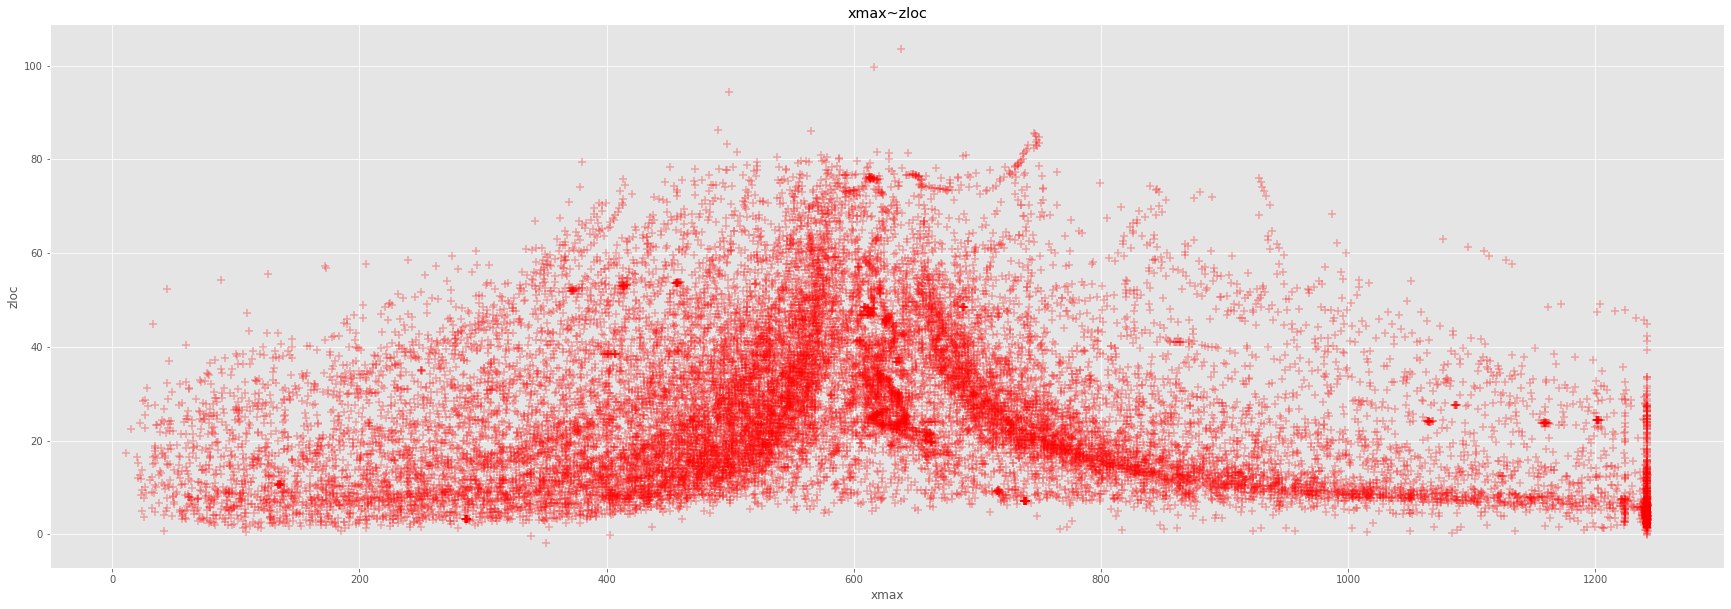

In [28]:
plt.style.use('ggplot')
df_train.plot(kind='scatter', x='xmax', y='zloc', marker='+', figsize=(30,10), c='red', s=50, alpha=0.3)
plt.title('xmax~zloc')
plt.show()

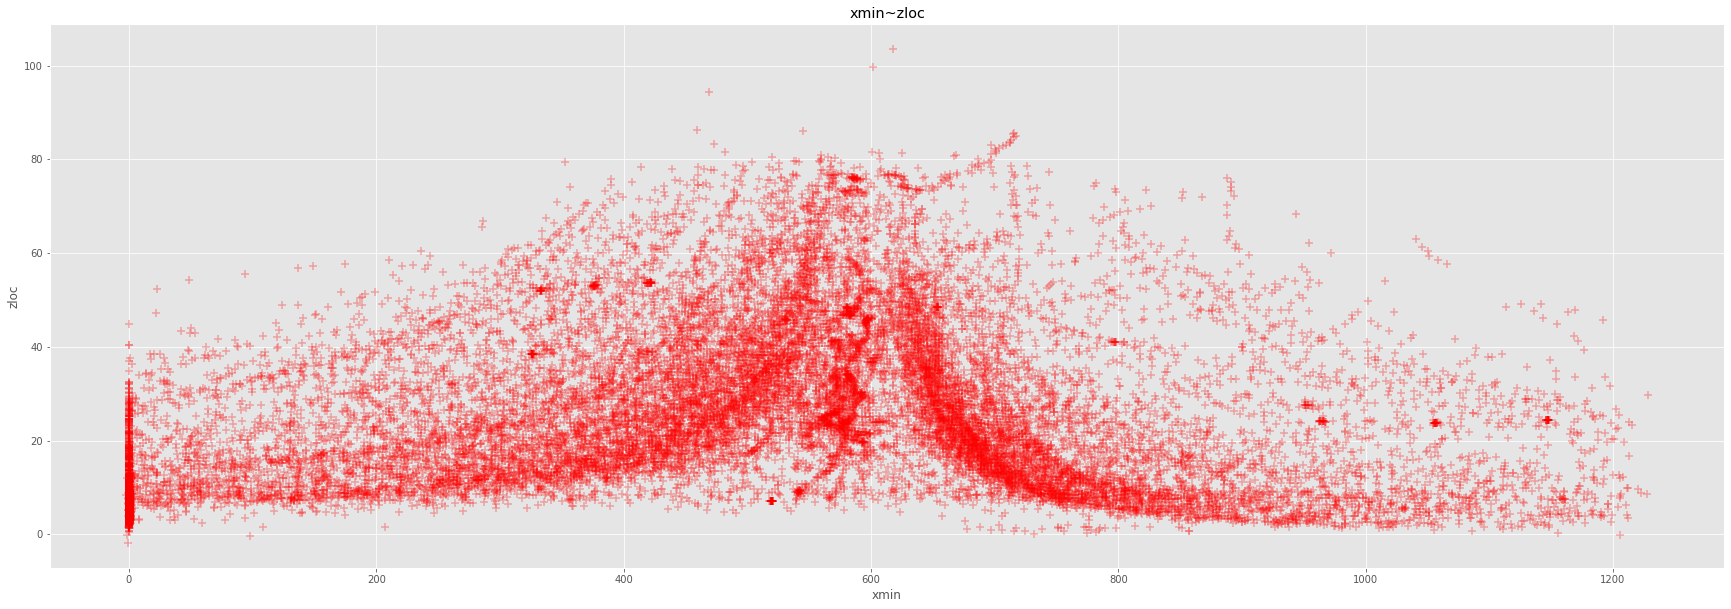

In [29]:
plt.style.use('ggplot')
df_train.plot(kind='scatter', x='xmin', y='zloc', marker='+', figsize=(30,10), c='red', s=50, alpha=0.3)
plt.title('xmin~zloc')
plt.show()

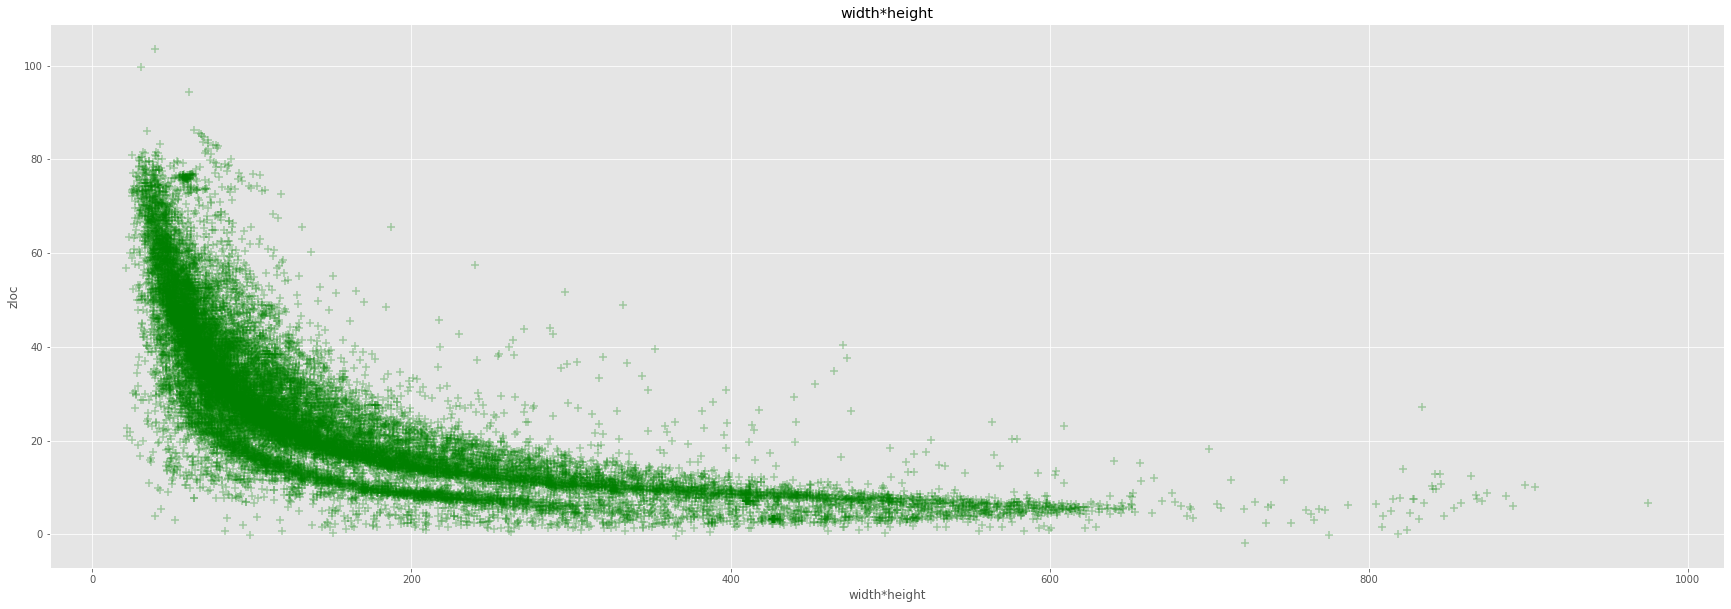

In [30]:
df_train['width*height'] = df_train['width']+df_train['height']

df_train.plot(kind='scatter', x='width*height', y='zloc', marker='+', figsize=(30,10), c='green', s=50, alpha=0.3)
plt.title('width*height')
plt.show()

# Filename 으로 구분해서 한번 살펴보기

In [31]:
df_train[['filename']].value_counts()

filename  
004139.png    17
005027.png    15
000535.png    14
003120.png    14
004704.png    14
              ..
004258.png     1
002174.png     1
002178.png     1
002179.png     1
000000.png     1
Length: 5151, dtype: int64

In [32]:
import numpy as np
mask = (df_train['zloc']<25) & (df_train['depth_mean']>6) & (df_train['depth_mean'] != np.inf) & (df_train['class']=='person') # 너무 이상한 값 # ex1) 80, 2

#mask = df_train['depth_mean'] == np.inf
df_mask = df_train[mask]
df_mask

Empty DataFrame
Columns: [filename, class, xmin, ymin, xmax, ymax, angle, zloc, weather, depth_x, depth_y, depth_mean, depth_min, depth_median, depth_max, depth_mean_trim, width, height, Misc, bicycle, car, person, train, truck, width*height]
Index: []

[0 rows x 25 columns]

In [33]:
#mask0 = df_train['zloc']/df_train['depth_mean'] < 15
#df_train = df_train[mask0]

In [34]:
df_filename = df_train[df_train['filename']=='000015.png']
df_filename

filename   class         xmin       ymin        xmax       ymax  angle  \
34  000015.png     car     1.482009  204.33633   403.36792  371.33084   2.29   
35  000015.png  person  1012.377440  147.88371  1100.48070  307.05510   0.71   
36  000015.png  person   666.194640  172.50061   683.35940  220.41449  -1.58   
37  000015.png  person   543.557200  178.61287   558.71564  216.97372  -1.46   

     zloc weather  depth_x  ...  depth_mean_trim       width     height  Misc  \
34   4.10   clone      125  ...         0.609135  401.885911  166.99451     0   
35   7.59   clone     1053  ...         1.130076   88.103260  159.17139     0   
36  24.14   clone      679  ...         3.982752   17.164760   47.91388     0   
37  23.30   clone      551  ...         4.182999   15.158440   38.36085     0   

    bicycle  car  person  train  truck  width*height  
34        0    1       0      0      0    568.880421  
35        0    0       1      0      0    247.274650  
36        0    0       1      0      0     65.078640  
37        0    0       1      0      0     53.519290  

[4 rows x 25 columns]

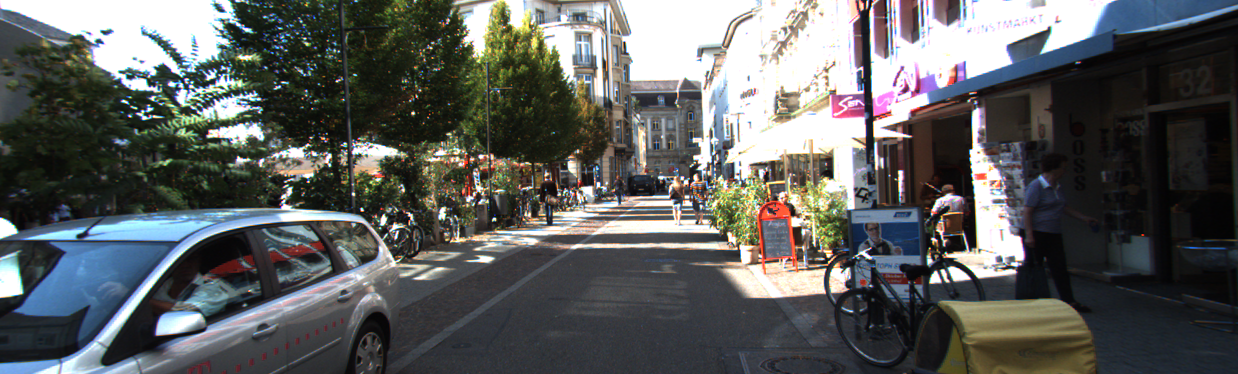

In [35]:
from PIL import Image
#img = Image.open("../datasets/data/image/train/002527.png") # 3695랑 거의 same...
img = Image.open("../datasets/data/image/train/000015.png")
img

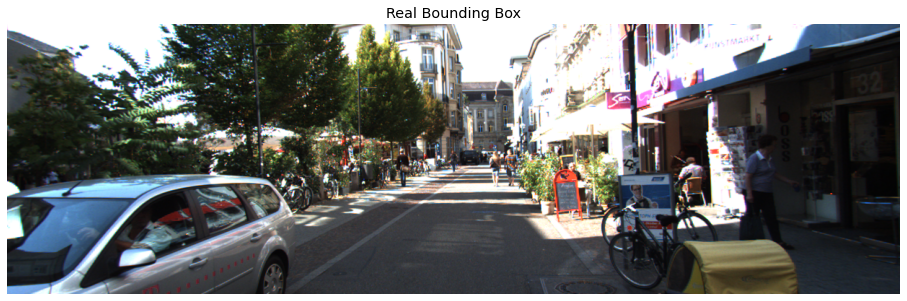

In [36]:
class_list = df_filename[['class']].values
coordinates = df_filename[['xmin','ymin','xmax','ymax']].values
z_loc = df_filename[['zloc']].values
depth_min = df_filename[['depth_mean']].values

# colors for visualization
COLORS = [[0.000, 0.447, 0.741], [0.850, 0.325, 0.098], [0.929, 0.694, 0.125],
          [0.494, 0.184, 0.556], [0.466, 0.674, 0.188], [0.301, 0.745, 0.933]]

# 시각화 (특정 부분만)
def plot_results0(pil_img, class_name, boxes, zloc, depth_min):
    plt.figure(figsize=(16,10))
    plt.imshow(pil_img)
    ax = plt.gca()

    for p, z, depth, (xmin, ymin, xmax, ymax), c in zip(class_name, zloc, depth_min, boxes.tolist(), COLORS * 100):
        #cl = p.argmax()
        text = p
        if z == 24.22 :
            ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                   fill=False, color=c, linewidth=1))
            ax.text(xmin, ymin, str(z)+str(depth), fontsize=15,
                    bbox=dict(facecolor='yellow', alpha=0.5))
    plt.axis('off')
    plt.title('Real Bounding Box')
    plt.show()

plot_results0(img, class_list, coordinates, z_loc, depth_min)

In [37]:
df_train['depth_min'].value_counts()

2.315552    2
2.959661    2
2.075099    2
1.112726    2
1.766497    2
           ..
0.814976    1
3.116822    1
4.020622    1
3.035215    1
0.796054    1
Name: depth_min, Length: 21059, dtype: int64

In [38]:
#mask1 = (df_train['depth_mean']-0.0930*df_train['zloc'])+1.116 > 0
#mask2 = (df_train['depth_mean']-0.13*df_train['zloc'])-2.5 < 0
#mask3 = (mask1 & mask2)
#ask3 = (df_valid['depth_mean']-0.0930*df_valid['zloc']+1.116) > 0
#df_train = df_train[mask2]
#df_train = df_train[mask3]
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21067 entries, 0 to 21066
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   filename         21067 non-null  object 
 1   class            21067 non-null  object 
 2   xmin             21067 non-null  float64
 3   ymin             21067 non-null  float64
 4   xmax             21067 non-null  float64
 5   ymax             21067 non-null  float64
 6   angle            21067 non-null  float64
 7   zloc             21067 non-null  float64
 8   weather          21067 non-null  object 
 9   depth_x          21067 non-null  int64  
 10  depth_y          21067 non-null  int64  
 11  depth_mean       21067 non-null  float64
 12  depth_min        21067 non-null  float64
 13  depth_median     21067 non-null  float64
 14  depth_max        21067 non-null  float64
 15  depth_mean_trim  21067 non-null  float64
 16  width            21067 non-null  float64
 17  height      

# 새롭게 추가된 변수 살펴보기

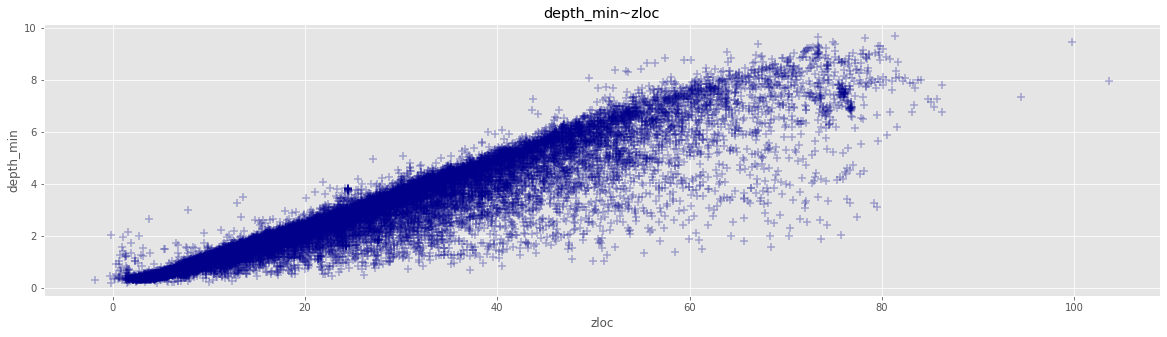

In [39]:
plt.style.use('ggplot')
df_train.plot(kind='scatter', x='zloc', y='depth_min', marker='+', figsize=(20,5), c='darkblue', s=50, alpha=0.3)
plt.title('depth_min~zloc')
plt.show()

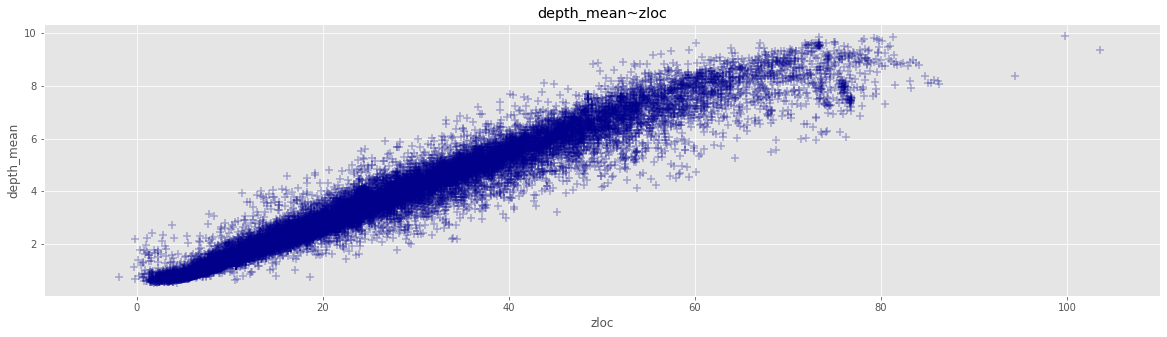

In [40]:
plt.style.use('ggplot')
df_train.plot(kind='scatter', x='zloc', y='depth_mean', marker='+', figsize=(20,5), c='darkblue', s=50, alpha=0.3)
plt.title('depth_mean~zloc')
plt.xlim(-10,110)
plt.show()

In [51]:
len(df_valid)

4514

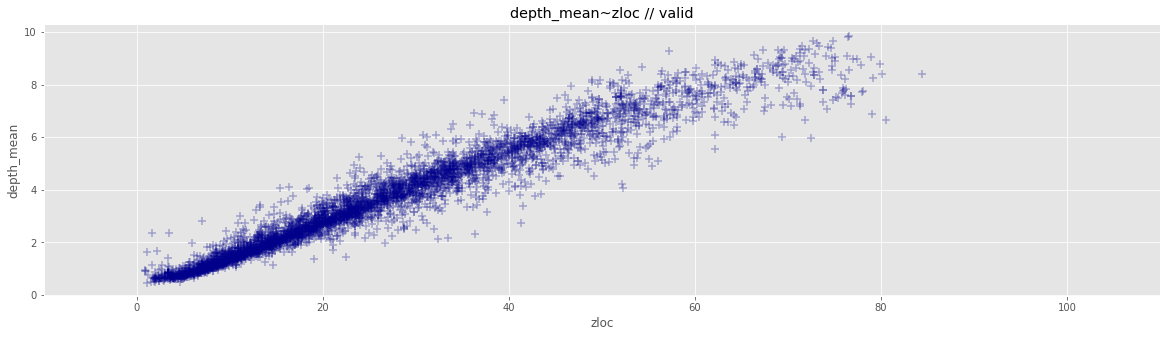

In [52]:
plt.style.use('ggplot')
df_valid.plot(kind='scatter', x='zloc', y='depth_mean', marker='+', figsize=(20,5), c='darkblue', s=50, alpha=0.3)
plt.title('depth_mean~zloc // valid')
plt.xlim(-10,110)
plt.show()

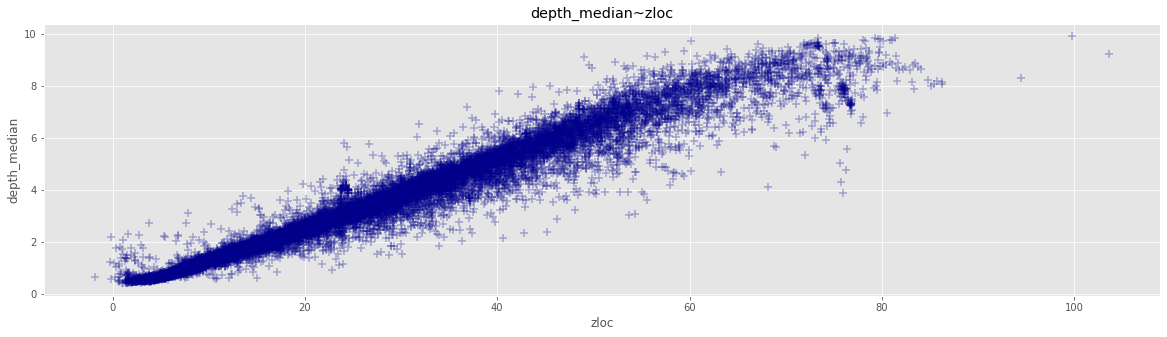

In [42]:
plt.style.use('ggplot')
df_train.plot(kind='scatter', x='zloc', y='depth_median', marker='+', figsize=(20,5), c='darkblue', s=50, alpha=0.3)
plt.title('depth_median~zloc')
plt.show()

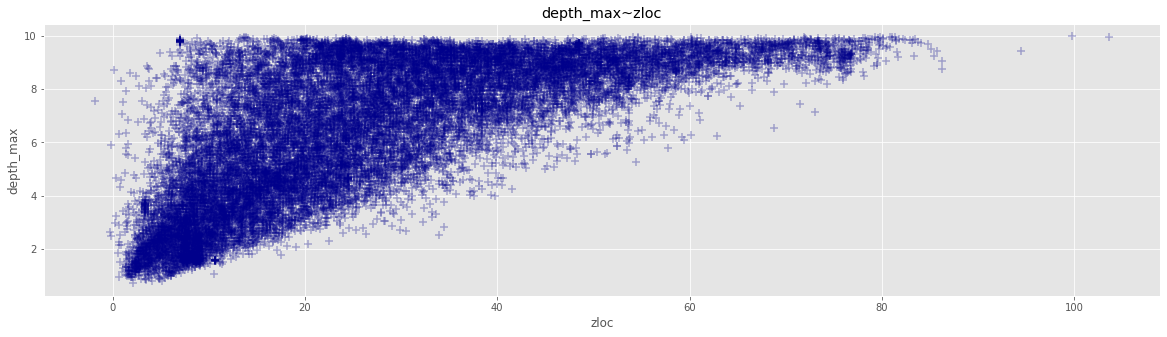

In [43]:
plt.style.use('ggplot')
df_train.plot(kind='scatter', x='zloc', y='depth_max', marker='+', figsize=(20,5), c='darkblue', s=50, alpha=0.3)
plt.title('depth_max~zloc')
plt.show()

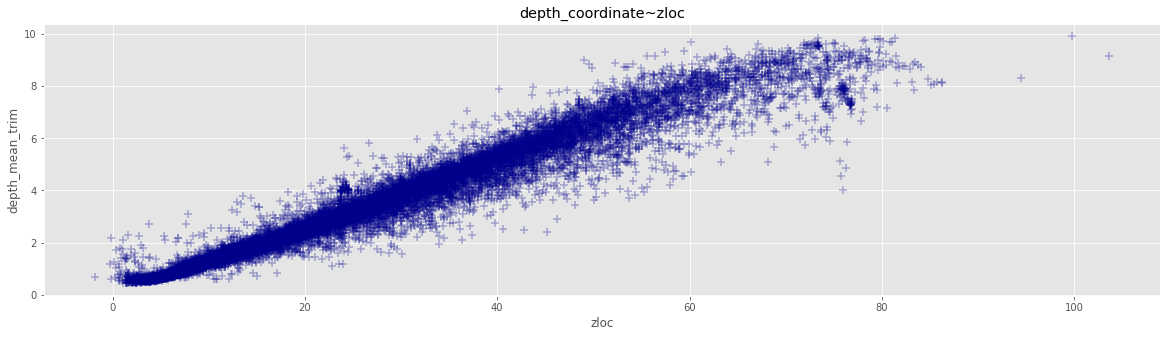

In [44]:
plt.style.use('ggplot')
df_train.plot(kind='scatter', x='zloc', y='depth_mean_trim', marker='+', figsize=(20,5), c='darkblue', s=50, alpha=0.3)
plt.title('depth_coordinate~zloc')
plt.show()

# 사람에 대한 분포

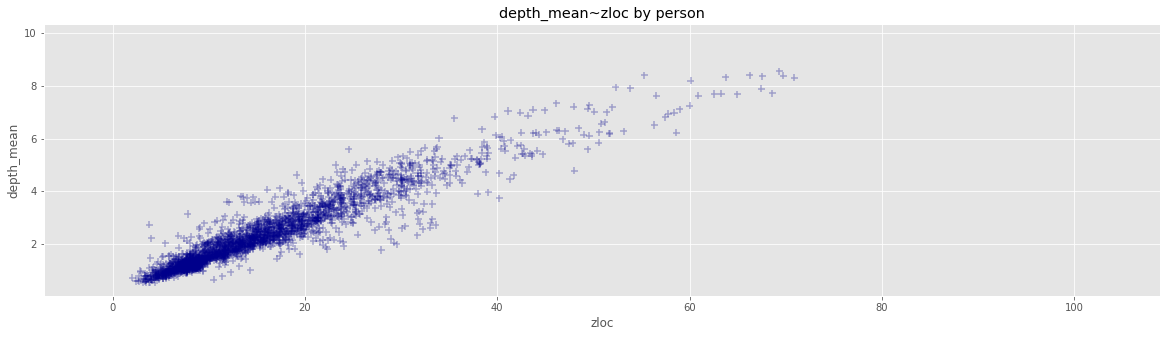

In [45]:
person = df_train['person'].values * 50

plt.style.use('ggplot')
df_train.plot(kind='scatter', x='zloc', y='depth_mean', marker='+', figsize=(20,5), c='darkblue', s=person, alpha=0.3)
plt.title('depth_mean~zloc by person')
plt.show()

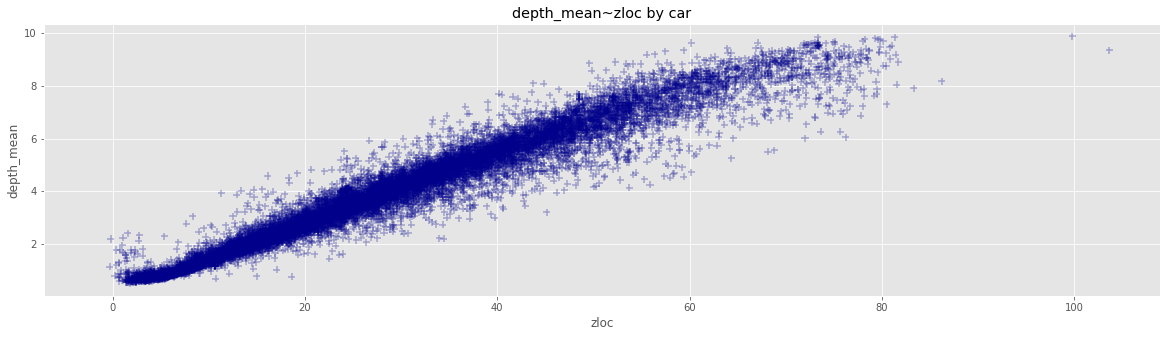

In [46]:
car = df_train['car'].values * 50

plt.style.use('ggplot')
df_train.plot(kind='scatter', x='zloc', y='depth_mean', marker='+', figsize=(20,5), c='darkblue', s=car, alpha=0.3)
plt.title('depth_mean~zloc by car')
plt.show()

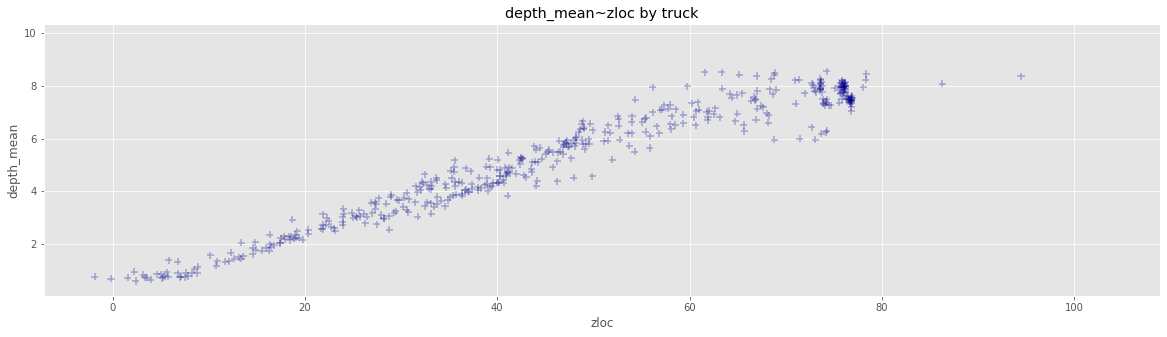

In [47]:
truck = df_train['truck'].values * 50

plt.style.use('ggplot')
df_train.plot(kind='scatter', x='zloc', y='depth_mean', marker='+', figsize=(20,5), c='darkblue', s=truck, alpha=0.3)
plt.title('depth_mean~zloc by truck')
plt.show()

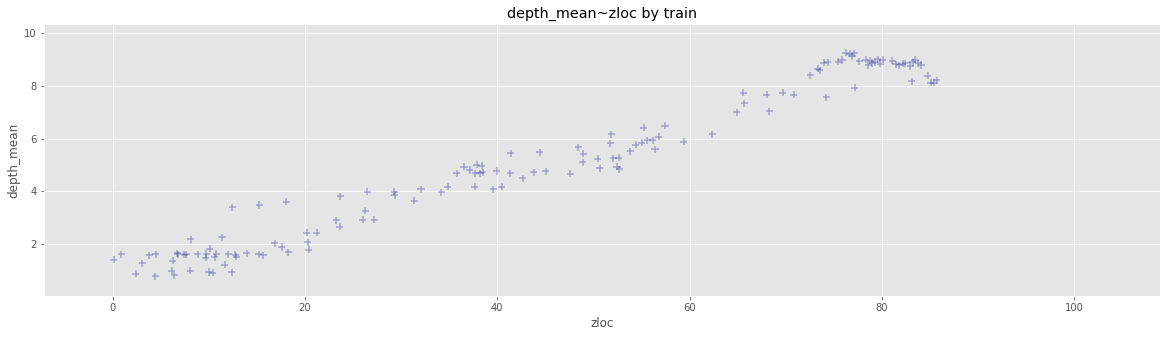

In [48]:
train = df_train['train'].values * 50

plt.style.use('ggplot')
df_train.plot(kind='scatter', x='zloc', y='depth_mean', marker='+', figsize=(20,5), c='darkblue', s=train, alpha=0.3)
plt.title('depth_mean~zloc by train')
plt.show()

In [49]:
a = np.array([np.nan,np.nan])
np.nanmin(a)

C:\Users\Admin\AppData\Local\Temp/ipykernel_20772/2607173218.py:2: RuntimeWarning: All-NaN slice encountered
  np.nanmin(a)


nan